In [10]:
%matplotlib inline
from scipy.cluster.vq import kmeans, vq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 18})

### K-means Clustering of Darks by Temperature

K-means is a method for making k clusters out of n observations. K-means begins with random placement of indices in parameter space so its good practice to set a seed. Note that seed setting is a bit wonky in jupyter notebooks, so any cell with a variable output should have a seed declaration directly inside it, but for a script one call is sufficient.

In [11]:
np.random.seed((1000,2000)) # Same outcome every time

Suppose you want to cluster 30 dark images into triplets based on their temperature. We'll generate a normal distribution of 30 "darks" centered around 18&deg;C

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,
         3.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13.98020177,  14.04967031,  14.11913884,  14.18860737,
         14.2580759 ,  14.32754443,  14.39701296,  14.46648149,
         14.53595003,  14.60541856,  14.67488709,  14.74435562,
         14.81382415,  14.88329268,  14.95276121,  15.02222975,
         15.09169828,  15.16116681,  15.23063534,  15.30010387,
         15.3695724 ,  15.43904094,  15.50850947,  15.577978  ,
         15.64744653,  15.71691506,  15.78638359, 

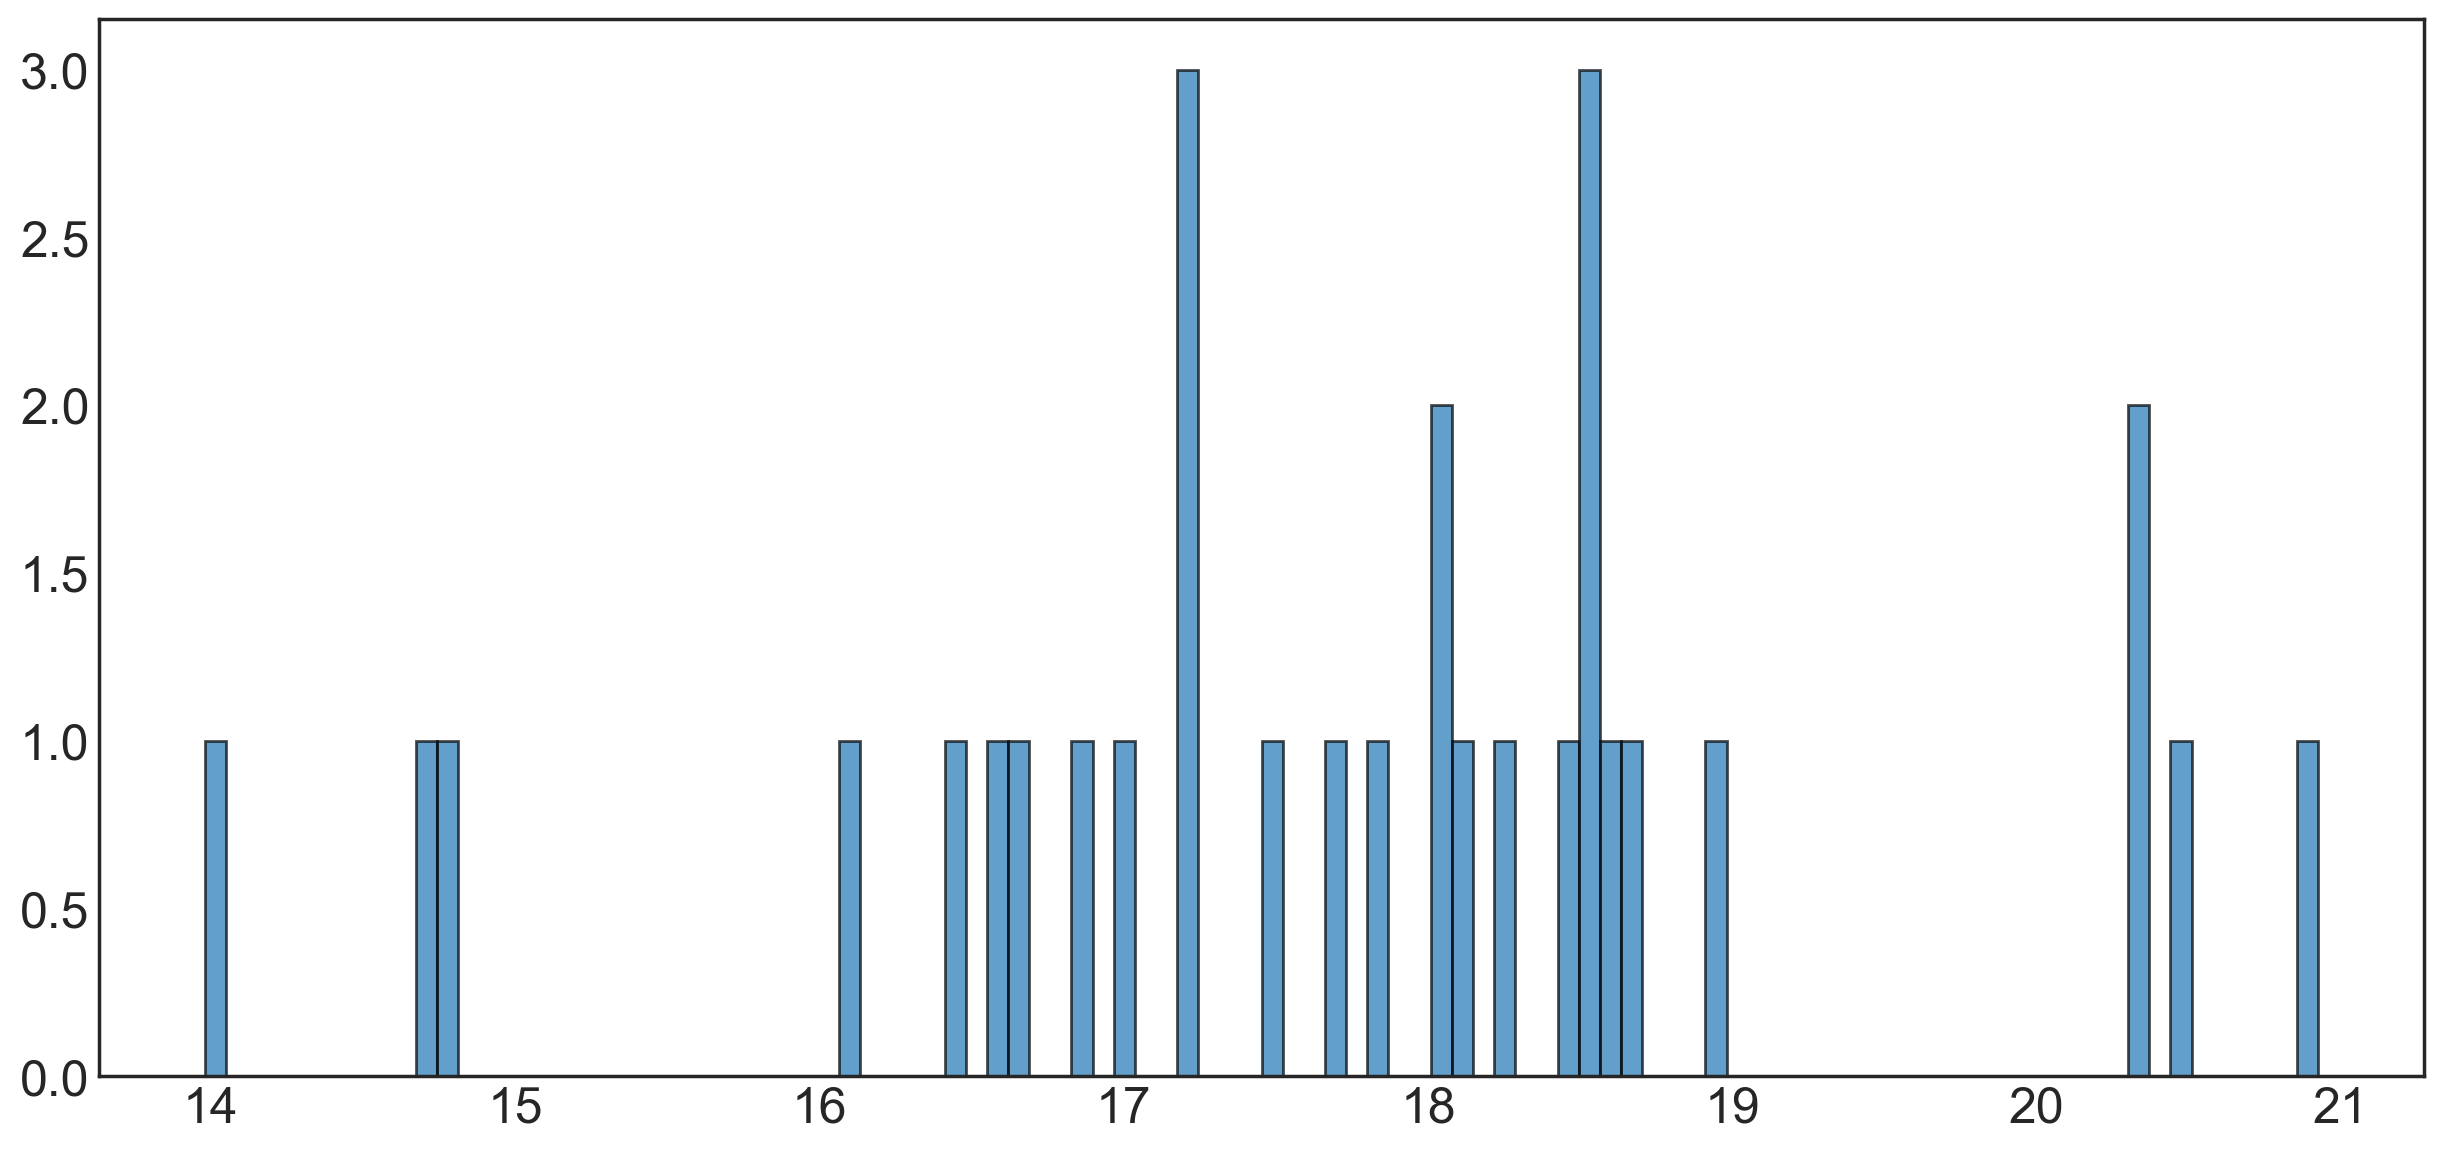

In [17]:
fig = plt.figure(figsize=(15,7))
fig.dpi = 200

np.random.seed((1000,2000))
darks = np.random.normal(18.0,2.0,30)
plt.hist(darks,histtype='bar',ec='black',alpha=0.7,color = plt.cm.tab20(0),bins=100)

While not required, it's nice to sort these darks by temperature first. The advantage of this is that it becomes easier to visually assess how k-means clustered the data.

In [13]:
sorted_darks=sorted(darks)

The actual kmeans code itself is fairly straight forward. We specify that we want k-means to try to cluster the data into triplets, hence we assign a variable **darks_per_cluster** to represent that value (3). K-means won't perfectly cut into triplets, but it will search for them where it can find them. Calling the _kmeans_ function requires two inputs, the list of darks and the number of clusters. The output for kmeans, labeled **codebook** here, is then input into _scipy.cluster.vq_ (Vector Quantization) along with the sorted darks. 

In [14]:
np.random.seed((1000,2000))
darks_per_cluster = 3
n_clusters = int(np.round(len(sorted_darks)/darks_per_cluster)) #30/3 = 10
codebook, _ = kmeans(sorted_darks, n_clusters)  # three clusters
cluster_indices, _ = vq(sorted_darks, codebook)
print(cluster_indices)

[9 8 8 4 6 6 6 6 3 3 3 3 3 2 2 1 1 1 1 7 7 7 7 7 7 7 0 0 0 5]


The output, shown above, is a list of cluster indices related to **sorted_darks**. For each dark in sorted darks, it's respective cluster index is given. We can then use these cluster indices to break **clustered_darks** into subarrays.

In [15]:
clustered_darks = [[] for _ in range(n_clusters)]
for dark, cluster_idx in zip(sorted_darks,cluster_indices):
    clustered_darks[cluster_idx].append(dark)

With these subarrays defined, let's take a look at how K-means decided to group the darks. We'll do this by overplotting histograms of each cluster.

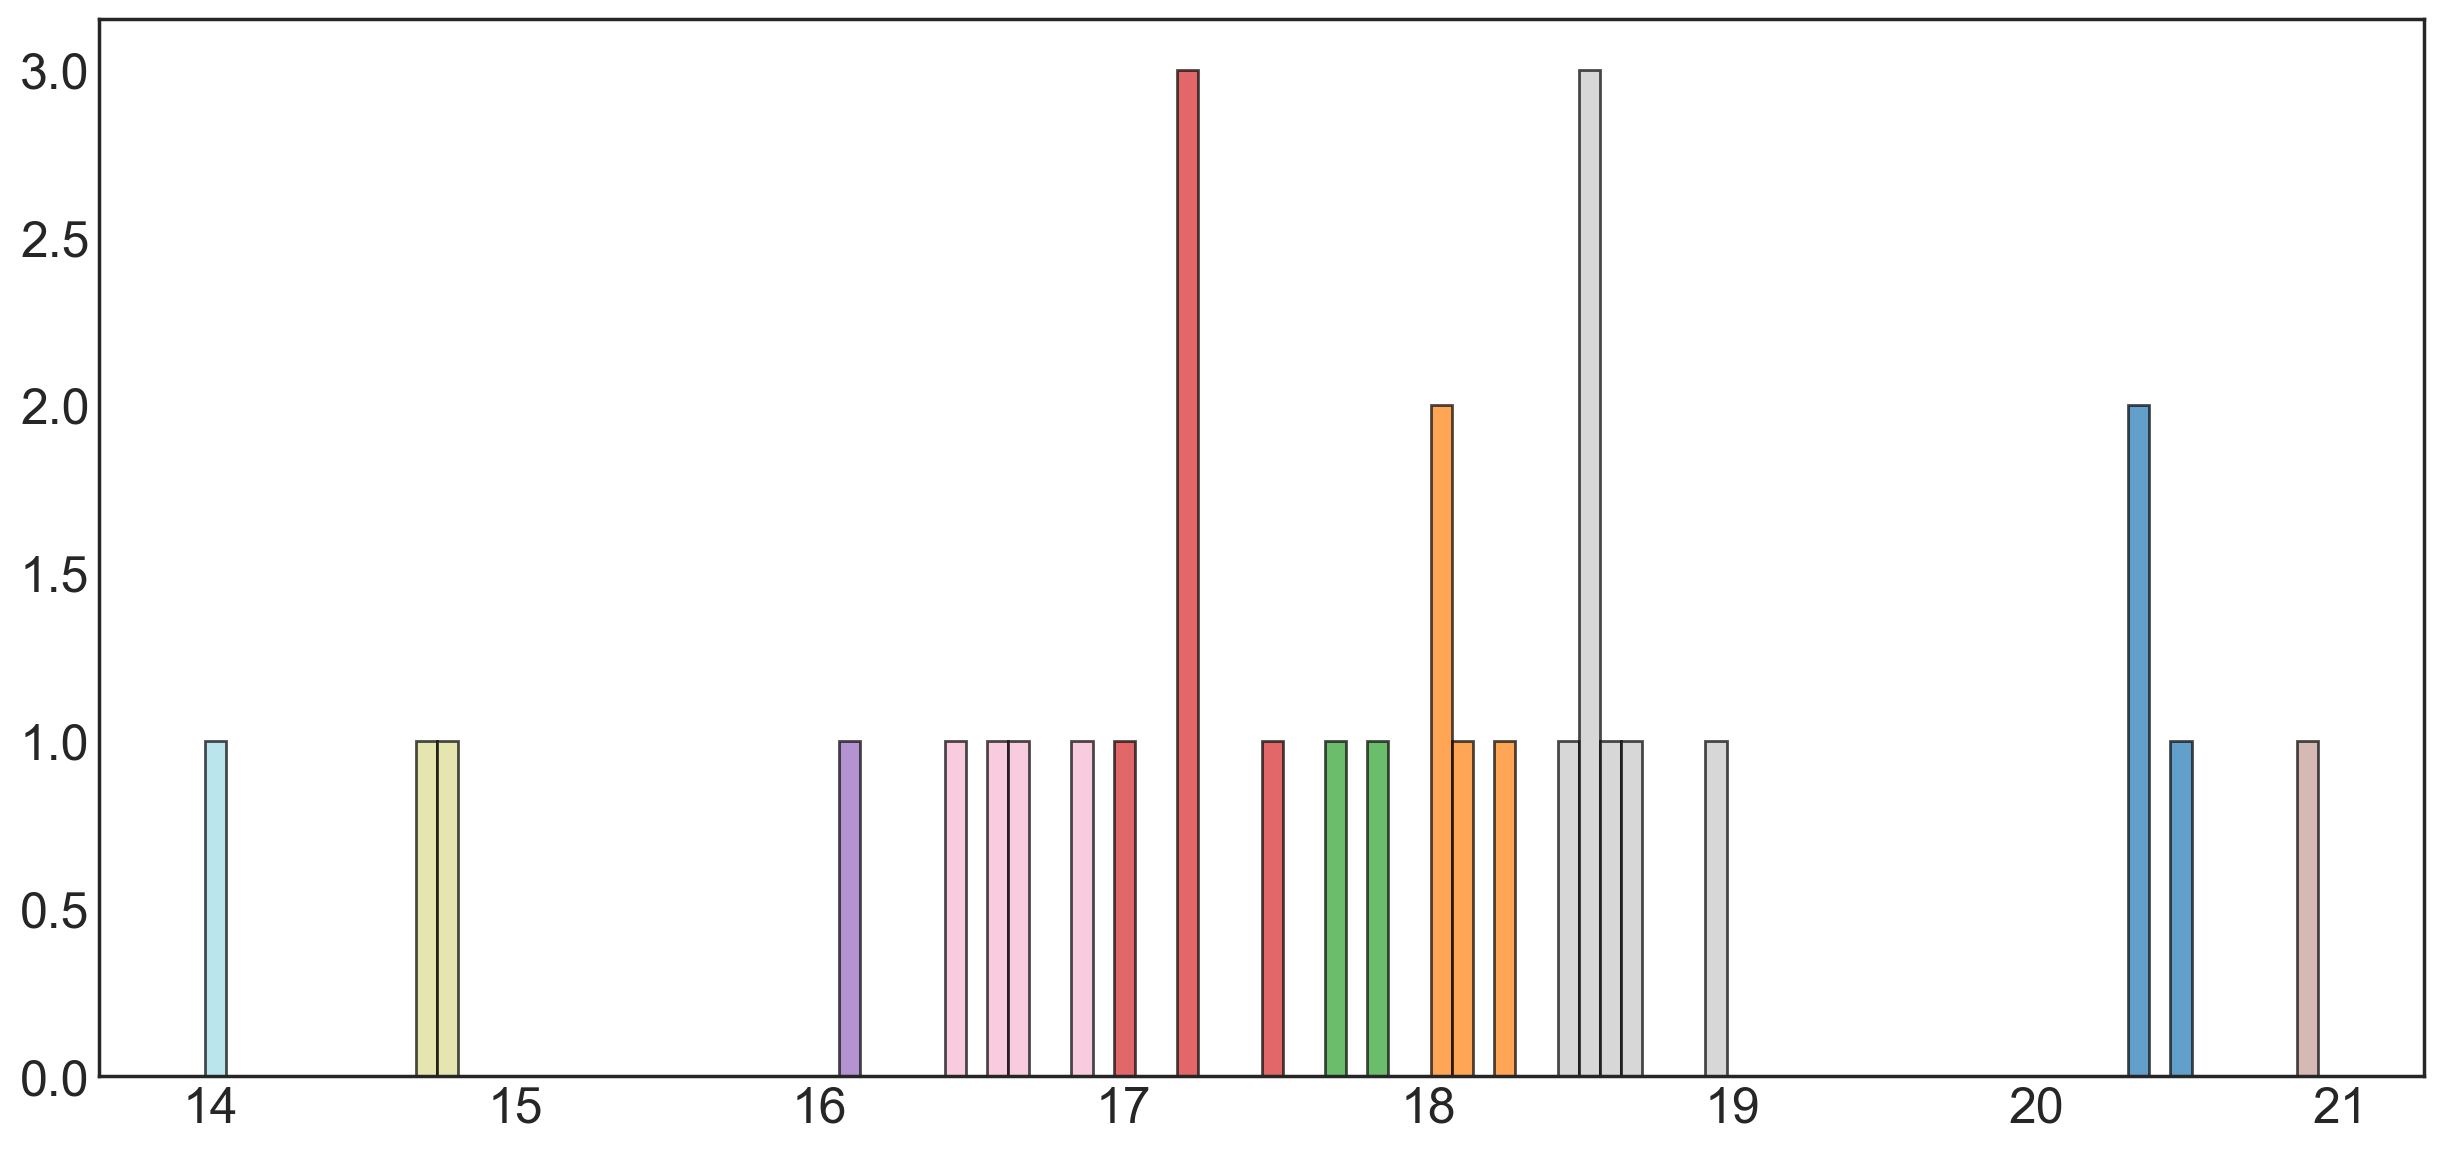

In [16]:
fig,ax = plt.subplots(figsize=(15,7))
fig.dpi = 200

color_idx = np.linspace(0, 1, len(clustered_darks))
bins=np.histogram(np.hstack(clustered_darks), bins=100)[1] #designate a consistent binsize across each cluster
for idx,cluster in enumerate(clustered_darks):
    ax.hist(cluster,histtype='bar',ec='black',bins=bins, color = plt.cm.tab20(color_idx[idx]),alpha = 0.7)

Note that in this case, only one cluster was actually a triplet! This is because we define a number of clusters to be populated, rather than designating triplets specifically. This is both a benefit and a caveat of the k-means clustering algorithm. The benefit being that we are less prone to forcing triplets comprised of darks with different temperatures. However, if we are dependent on generating triplets specifically for combination, we effectively throw out much of our data that doesn't nicely fit into triplet clusters. 